In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt
shap.initjs()

/home/hf8585/.conda/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(np.linspace(5, 7.5, 100))

[5.         5.02525253 5.05050505 5.07575758 5.1010101  5.12626263
 5.15151515 5.17676768 5.2020202  5.22727273 5.25252525 5.27777778
 5.3030303  5.32828283 5.35353535 5.37878788 5.4040404  5.42929293
 5.45454545 5.47979798 5.50505051 5.53030303 5.55555556 5.58080808
 5.60606061 5.63131313 5.65656566 5.68181818 5.70707071 5.73232323
 5.75757576 5.78282828 5.80808081 5.83333333 5.85858586 5.88383838
 5.90909091 5.93434343 5.95959596 5.98484848 6.01010101 6.03535354
 6.06060606 6.08585859 6.11111111 6.13636364 6.16161616 6.18686869
 6.21212121 6.23737374 6.26262626 6.28787879 6.31313131 6.33838384
 6.36363636 6.38888889 6.41414141 6.43939394 6.46464646 6.48989899
 6.51515152 6.54040404 6.56565657 6.59090909 6.61616162 6.64141414
 6.66666667 6.69191919 6.71717172 6.74242424 6.76767677 6.79292929
 6.81818182 6.84343434 6.86868687 6.89393939 6.91919192 6.94444444
 6.96969697 6.99494949 7.02020202 7.04545455 7.07070707 7.0959596
 7.12121212 7.14646465 7.17171717 7.1969697  7.22222222 7.24747

In [3]:
print(football_wins(pro_data))

NameError: name 'football_wins' is not defined

In [7]:
def football_wins(inputs):
    squad_cost, average_squad_age, injury_count = inputs[:,0], inputs[:,1], inputs[:,2]
    win_rate = 2*squad_cost**2 - 10*(average_squad_age - 24)**2 - 5*injury_count
    return win_rate/(2*30**2)

pro_data_range = {'squad_cost': np.linspace(15, 30, 10), 
                  'average_squad_age': np.linspace(20, 30, 10), 
                  'injury_count': np.linspace(0, 10, 10)}

average_data_range = {'squad_cost': np.linspace(0, 1, 10), 
                      'average_squad_age': np.linspace(20, 30, 10), 
                      'injury_count': np.linspace(0, 10, 10)}


# make a grid of all combinations of this data
pro_data = np.array(np.meshgrid(pro_data_range['squad_cost'], 
                                 pro_data_range['average_squad_age'], 
                                 pro_data_range['injury_count'])).T.reshape(-1, 3)

average_data = np.array(np.meshgrid(average_data_range['squad_cost'],
                                    average_data_range['average_squad_age'],
                                    average_data_range['injury_count'])).T.reshape(-1, 3)

pro_team_1 = np.array([[25, 22, 8]])
pro_team_2  = np.array([[24, 23, 5]])
print(f'wins by pro team 1 {football_wins(pro_team_1)}')
print(f'wins by pro team 2 {football_wins(pro_team_2)}')
# do shap analysis
explainer = shap.KernelExplainer(football_wins, pro_data)
shap_values = explainer.shap_values(pro_team_1)
shap_values_2 = explainer.shap_values(pro_team_2)
explainer_average = shap.KernelExplainer(football_wins, average_data)
shap_values_average_1 = explainer_average.shap_values(pro_team_1)
shap_values_average_2 = explainer_average.shap_values(pro_team_2)
print(f'Shap for pro_team_1 with pro context: {shap_values}')
print(f'Shap for pro_team_2 with pro context: {shap_values_2}')



print(f'Shap for pro_team_1 with average context: {shap_values_average_1}')
print(f'Shap for pro_team_2 with average context: {shap_values_average_2}')
print(shap_values[0][1])
squad_cost = [shap_values[0][0], shap_values_2[0][0], shap_values_average_1[0][0], shap_values_average_2[0][0]]
squad_age = [shap_values[0][1], shap_values_2[0][1], shap_values_average_1[0][1], shap_values_average_2[0][1]]
injury_count = [shap_values[0][2], shap_values_2[0][2], shap_values_average_1[0][2], shap_values_average_2[0][2]]


Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


wins by pro team 1 [0.65]
wins by pro team 2 [0.62055556]


100%|██████████| 1/1 [00:00<00:00, 13.22it/s]
Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 1/1 [00:00<00:00, 13.18it/s]

Shap for pro_team_1 with pro context: [[ 0.10648148  0.0399177  -0.00833333]]
Shap for pro_team_2 with pro context: [[0.05203704 0.05658436 0.        ]]
Shap for pro_team_1 with average context: [[ 0.6940535   0.0399177  -0.00833333]]
Shap for pro_team_2 with average context: [[0.63960905 0.05658436 0.        ]]
0.039917695473251594


<BarContainer object of 3 artists>

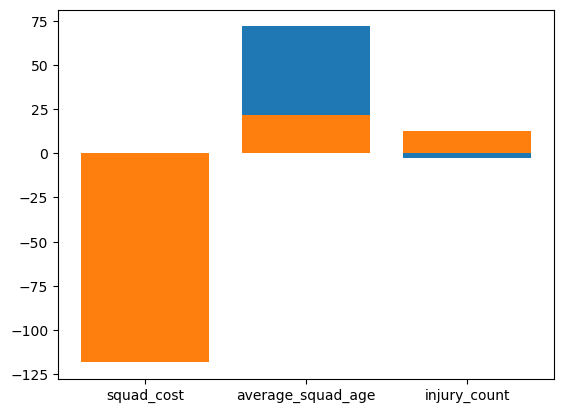

In [ ]:
# make a bar plot of shap_values and shap_values_2 next to each other
plt.bar(['squad_cost', 'average_squad_age', 'injury_count'], shap_values[0], label = )
plt.bar(['squad_cost', 'average_squad_age', 'injury_count'], shap_values_2[0])

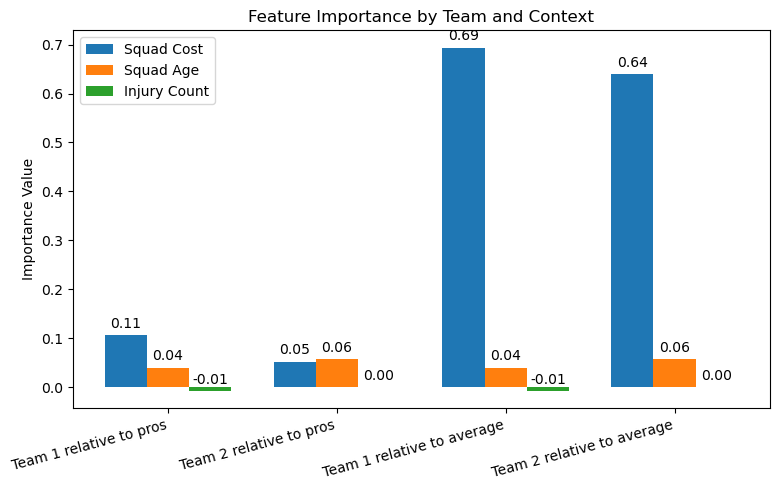

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Example data: importance values
# -------------------------------------------------
# Let's say we have importance values for each of the three factors
# for four contexts: 
#    1) Team 1 (Pro), 
#    2) Team 1 (Regular), 
#    3) Team 2 (Pro), 
#    4) Team 2 (Regular).

labels = [
    "Team 1 relative to pros",
    "Team 2 relative to pros",
    "Team 1 relative to average",
    "Team 2 relative to average",
]

# Example importance values (replace these with your actual data)
# squad_cost =   [0.11, 0.05, 0.69, 0.64]
# squad_age =    [0.04, 0.01, 0.04, 0.01]
# injury_count = [-0.01, 0, -0.01, 0]

# 2. Plotting set-up
# -------------------------------------------------
x = np.arange(len(labels))  # The label locations (4 positions)
width = 0.25                # The width of each bar

# 3. Create the figure and bar plots
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))  # You can adjust figsize as needed

# Plot each set of values slightly shifted on the x-axis
rects1 = ax.bar(x - width, squad_cost,   width, label="Squad Cost")
rects2 = ax.bar(x,        squad_age,     width, label="Squad Age")
rects3 = ax.bar(x + width, injury_count, width, label="Injury Count")

# 4. Labeling and finishing touches
# -------------------------------------------------
ax.set_ylabel("Importance Value")
ax.set_title("Feature Importance by Team and Context")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15, ha="right")  # rotate labels if they get cramped
ax.legend()

# Optional: Add labels on top of each bar
def autolabel(rects):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.2f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),   # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom'
        )

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()  # Adjusts spacing to fit plot elements nicely

plt.show()


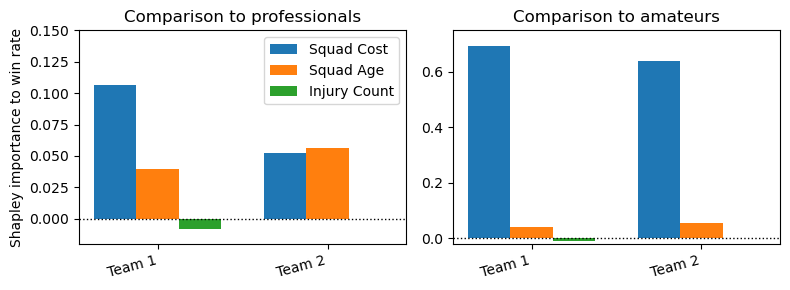

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: importance values
labels = [
    "Team 1",
    "Team 2",
    "Team 1",
    "Team 2",
]

# Select only the relevant indices for each subplot
labels_pros = labels[:2]  # First two: Team 1 & Team 2 relative to pros
labels_avg = labels[2:]   # Last two: Team 1 & Team 2 relative to average

squad_cost_pros = squad_cost[:2]
squad_age_pros = squad_age[:2]
injury_count_pros = injury_count[:2]

squad_cost_avg = squad_cost[2:]
squad_age_avg = squad_age[2:]
injury_count_avg = injury_count[2:]

# X locations for the groups
x_pros = np.arange(len(labels_pros))
x_avg = np.arange(len(labels_avg))
width = 0.25  # Width of bars

# Create figure and subplots with separate y-axes
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
#plt.rcParams.update({'font.size': 14})
# First subplot: Team 1 & Team 2 relative to pros
axes[0].bar(x_pros - width, squad_cost_pros, width, label="Squad Cost")
axes[0].bar(x_pros, squad_age_pros, width, label="Squad Age")
axes[0].bar(x_pros + width, injury_count_pros, width, label="Injury Count")
#
axes[0].set_title("Comparison to professionals")
axes[0].set_xticks(x_pros)
axes[0].set_xticklabels(labels_pros, rotation=15, ha="right")
axes[0].legend()
axes[0].set_ylabel("Shapley importance to win rate")
axes[0].set_ylim(-0.02, 0.15)  # Custom y-axis limit for pros
axes[0].axhline(0, color='black', linestyle='dotted', linewidth=1)  # Dotted line at y=0

# Second subplot: Team 1 & Team 2 relative to average
axes[1].bar(x_avg - width, squad_cost_avg, width, label="Squad Cost")
axes[1].bar(x_avg, squad_age_avg, width, label="Squad Age")
axes[1].bar(x_avg + width, injury_count_avg, width, label="Injury Count")
axes[1].set_title("Comparison to amateurs")
axes[1].set_xticks(x_avg)
axes[1].set_xticklabels(labels_avg, rotation=15, ha="right")
#axes[1].legend()
axes[1].set_ylim(-0.02, 0.75)  # Custom y-axis limit for average
axes[1].axhline(0, color='black', linestyle='dotted', linewidth=1)  # Dotted line at y=0

# Adjust layout
fig.tight_layout()
plt.savefig('plots/shap_football.pdf', bbox_inches='tight')
# Display the plot
plt.show()
